In [29]:
import pandas as pd

# Gas Dataset load and data prep

In [30]:
df = pd.read_csv (r'/Users/test/Projects/Gasolina-Petroleo-Dataset/DataSet/2004-2021.tsv', sep = '\t')
isGas = df['PRODUTO']=="GASOLINA COMUM"
df_gas = df[isGas]

# Retirando colunas desnecessárias.
df_gas = df_gas.drop(['PREÇO MÉDIO DISTRIBUIÇÃO',
                      'DESVIO PADRÃO DISTRIBUIÇÃO',
                      'PREÇO MÍNIMO DISTRIBUIÇÃO',
                      'PREÇO MÁXIMO DISTRIBUIÇÃO',
                      'COEF DE VARIAÇÃO DISTRIBUIÇÃO',
                      'DATA FINAL',
                      'PRODUTO',
                      'ESTADO',
                      'DESVIO PADRÃO REVENDA',
                      'PREÇO MÍNIMO REVENDA',
                      'PREÇO MÁXIMO REVENDA',
                      'COEF DE VARIAÇÃO REVENDA'], axis=1)

# Renomeando colunas para o padrão correto.
df_gas.rename(columns = {
    'NÚMERO DE POSTOS PESQUISADOS':'gas_stations_searched',
    'PREÇO MÉDIO REVENDA':'avg_price',
    'DATA INICIAL':'initial_date',
    'REGIÃO':'region',
    'MES':'month',
    'ANO':'year'
}, inplace = True)

df_gas['initial_date'] = pd.to_datetime(df_gas['initial_date'], format='%Y-%m-%d')
df_gas['month'] = pd.DatetimeIndex(df_gas['initial_date']).month
df_gas['year'] = pd.DatetimeIndex(df_gas['initial_date']).year
df_gas

,initial_date,region,gas_stations_searched,UNIDADE DE MEDIDA,avg_price,MARGEM MÉDIA REVENDA,month,year
12064,2004-05-09,CENTRO OESTE,128,R$/l,2.029,0.318,5,2004
12065,2004-05-09,CENTRO OESTE,395,R$/l,2.025,0.296,5,2004
12066,2004-05-09,CENTRO OESTE,194,R$/l,2.358,0.472,5,2004
12067,2004-05-09,CENTRO OESTE,166,R$/l,2.120,0.325,5,2004
12068,2004-05-09,NORDESTE,106,R$/l,2.090,0.35,5,2004
...,...,...,...,...,...,...,...,...
120721,2021-04-25,NORTE,12,R$/l,5.364,-99999.0,4,2021
120722,2021-04-25,SUL,119,R$/l,5.051,-99999.0,4,2021
120723,2021-04-25,SUDESTE,1187,R$/l,5.265,-99999.0,4,2021
120724,2021-04-25,NORDESTE,34,R$/l,5.586,-99999.0,4,2021


In [31]:
region_centro_oeste = df_gas['region']=="CENTRO OESTE"
df_gas_centro_oeste = df_gas[region_centro_oeste]
df_gas_centro_oeste_gp = df_gas_centro_oeste.groupby(by=['year', 'month']).mean()
#dfGasGroup = dfGasGroup.drop(['month'], axis=1)s
df_gas_centro_oeste_gp

gas_stations_searched  avg_price
year month                                  
2004 5                   224.6875   2.135250
     6                   225.6250   2.197437
     7                   225.0625   2.225000
     8                   223.7000   2.281950
     9                   223.0625   2.290875
...                           ...        ...
2020 12                   50.6875   4.621187
2021 1                    58.3500   4.738250
     2                    61.5000   5.141188
     3                    69.0625   5.652687
     4                    73.5000   5.574438

[203 rows x 2 columns]

In [32]:
# region_nordeste = df_gas['region']=="NORDESTE"
# df_gas_nordeste = df_gas[region_nordeste]
# df_gas_nordeste_gp = df_gas_nordeste.groupby(by=['year', 'month', 'region']).mean()
# #dfGasGroup = dfGasGroup.drop(['REGIÃO'], axis=1)
# df_gas_nordeste_gp

In [33]:
# region_sudeste = df_gas['region']=='SUDESTE'
# df_gas_sudeste = df_gas[region_sudeste]
# df_Gas_sudeste_gp = df_gas_sudeste.groupby(by=['year', 'month', 'region']).mean()
# df_Gas_sudeste_gp

In [34]:
# region_sul = df_gas['region']=='SUL'
# df_gas_sul = df_gas[region_sul]
# df_gas_sul_gp = df_gas_sul.groupby(by=['year', 'month', 'region']).mean()
# df_gas_sul_gp

In [35]:
# region_norte = df_gas['region']=='NORTE'
# df_gas_norte = df_gas[region_norte]
# df_gas_norte_gp = df_gas_norte.groupby(by=['year', 'month', 'region']).mean()
# df_gas_norte_gp

# Petroleum Dataset load and data prep

In [36]:
csv_location = '/Users/test/Projects/Gasolina-Petroleo-Dataset/DataSet/Petróleo Brent Futuros Dados Históricos.csv'
dfPetro = pd.read_csv (csv_location)

In [37]:
dfPetro['Data'] = pd.to_datetime(dfPetro['Data'], format='%d.%m.%Y')
dfPetro['MES'] = pd.DatetimeIndex(dfPetro['Data']).month
dfPetro['ANO'] = pd.DatetimeIndex(dfPetro['Data']).year

dfPetro['Último'] = dfPetro['Último'].astype('str')
dfPetro['Último'] = dfPetro['Último'].str.replace(',', '.')
dfPetro['Último'] = pd.to_numeric(dfPetro['Último'], errors='coerce')

#dfPetro['Último'] = dfPetro['Último'].astype('str') 
#dfPetro.apply(lambda x: x.str.replace(',','.'))
#dfPetro['Último'] = dfPetro['Último'].astype(float)
#print(dfPetro.dtypes)
#dfPetro

In [38]:
dfPetro

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%,MES,ANO
0,2021-12-31,77.78,"78,81","79,68","77,55","148,96K","-1,94%",12,2021
1,2021-12-30,79.32,"79,19","79,66","78,50","10,90K","0,11%",12,2021
2,2021-12-29,79.23,"79,28","80,17","78,13","69,63K","0,37%",12,2021
3,2021-12-28,78.94,"78,67","79,85","78,48","50,41K","0,43%",12,2021
4,2021-12-27,78.60,"76,32","79,08","75,75","85,39K","3,23%",12,2021
...,...,...,...,...,...,...,...,...,...
2836,2011-01-07,93.33,"94,38","94,58","92,59","165,97K","-1,26%",1,2011
2837,2011-01-06,94.52,"95,70","96,12","94,01","217,45K","-1,03%",1,2011
2838,2011-01-05,95.50,"93,35","95,86","92,37","212,40K","2,11%",1,2011
2839,2011-01-04,93.53,"94,92","95,74","92,58","184,63K","-1,38%",1,2011


In [39]:
dfPeroGroup = dfPetro.groupby(by=['ANO', 'MES']).mean()

In [40]:
dfPeroGroup

Último
ANO  MES            
2011 1     96.907143
     2    104.032000
     3    114.671739
     4    123.090500
     5    114.521818
...              ...
2021 8     70.513636
     9     74.876364
     10    83.746190
     11    80.849545
     12    74.803913

[132 rows x 1 columns]

# Geração de graficos

In [41]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='ANO,MES'>

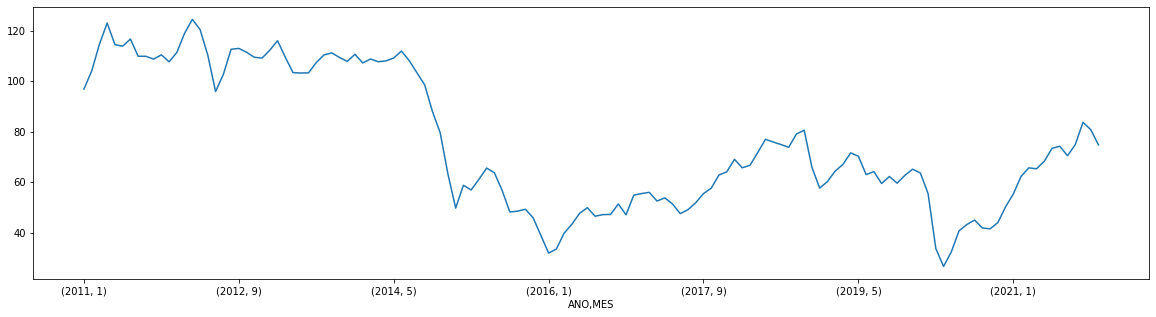

In [42]:
dfPeroGroup['Último'].plot(figsize=(20,5))

<AxesSubplot:xlabel='year,month'>

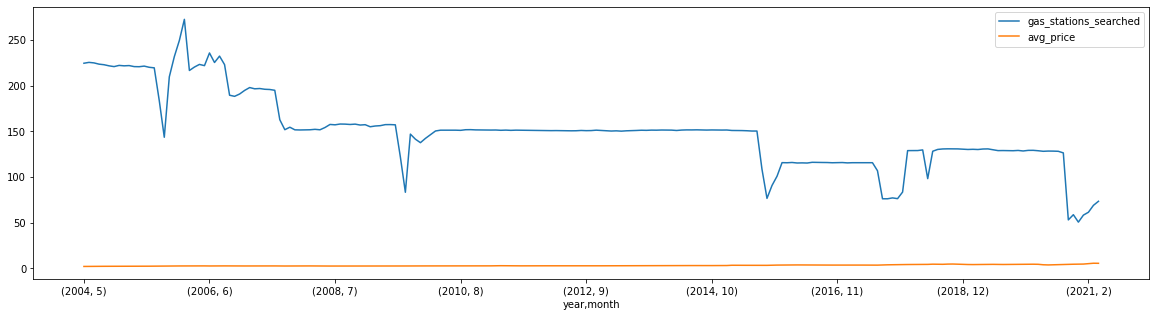

In [43]:
df_gas_centro_oeste_gp  .plot(figsize=(20,5))

In [44]:
# df_gas_norte_gp.plot(figsize=(20,5))

In [45]:
# df_gas_sul_gp.plot(figsize=(20,5))

In [46]:
# df_Gas_sudeste_gp.plot(figsize=(20,5))